## 1. Importacion de librerias

In [147]:
# Instalación de librerias
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
import numpy as np
import sys

import re, string, unicodedata
import contractions
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2. Carga de datos

In [148]:
scopusData = pd.read_csv('data/scopusArticles.csv', sep=',', encoding = 'utf-8')
scopusData.head()

Authors  \
0              Lichtenberg G.; Pangalos G.   
1  Bokrantz J.; Subramaniyan M.; Skoogh A.   
2               Yokota T.; Pagkalinawan H.   
3                         Al Janabi M.A.M.   
4                   Giuffrè M.; Shung D.L.   

                                   Author full names  \
0  Lichtenberg, Gerwald (23978244400); Pangalos, ...   
1  Bokrantz, Jon (56786404500); Subramaniyan, Muk...   
2  Yokota, Toshiyuki (57962746500); Pagkalinawan,...   
3                Al Janabi, Mazin A.M. (24463149200)   
4  Giuffrè, Mauro (57210704630); Shung, Dennis L....   

                            Author(s) ID  \
0               23978244400; 57217836266   
1  56786404500; 57191544364; 24588061100   
2               57962746500; 57194039166   
3                            24463149200   
4               57210704630; 56447050200   

                                               Title  Year  \
0  Constructive Alignment by Portfolio Exams for ...  2022   
1  Realising the promises of artificial intellige...  2023   
2  Application of Geographic Information Systems ...  2022   
3  Optimization algorithms and investment portfol...  2022   
4  Harnessing the power of synthetic data in heal...  2023   

                         Source title Volume Issue Art. No. Page start  ...  \
0                   IFAC-PapersOnLine     55    17      NaN        194  ...   
1     Production Planning and Control    NaN   NaN      NaN        NaN  ...   
2      Transportation Research Record   2676    11      NaN        171  ...   
3  Journal of Modelling in Management     17     3      NaN        864  ...   
4                npj Digital Medicine      6     1      186        NaN  ...   

  ISBN  CODEN  PubMed ID Language of Original Document  \
0  NaN    NaN        NaN                       English   
1  NaN  PPCOE        NaN                       English   
2  NaN  TRRED        NaN                       English   
3  NaN    NaN        NaN                       English   
4  NaN    NaN        NaN                       English   

  Abbreviated Source Title     Document Type Publication Stage  \
0        IFAC-PapersOnLine  Conference paper             Final   
1       Prod Plann Control           Article  Article in press   
2           Transp Res Rec      Book chapter             Final   
3        J. Model. Manage.           Article             Final   
4          npj Digit. Med.           Article             Final   

                                         Open Access  Source  \
0                All Open Access; Bronze Open Access  Scopus   
1  All Open Access; Green Open Access; Hybrid Gol...  Scopus   
2                                                NaN  Scopus   
3                                                NaN  Scopus   
4                  All Open Access; Gold Open Access  Scopus   

                  EID  
0  2-s2.0-85142285954  
1  2-s2.0-85165183489  
2  2-s2.0-85141811114  
3  2-s2.0-85106274228  
4  2-s2.0-85173631012  

[5 rows x 46 columns]

In [149]:
originalFrameworkData = pd.read_csv('data/verifiedArticles.csv', sep=',', encoding = 'ANSI')
originalFrameworkData.head()

Title  \
0  A Dashboard to Support Management of Business ...   
1  Project portfolio selection problems: A review...   
2  A decision-making framework for project portfo...   
3  Big data analytics in innovation processes: wh...   
4  A Data-driven project categorization process f...   

                                             Authors  Year  Cited by  \
0                      Santiago Rivera D.; Shanks G.  2015      22.0   
1  Mohagheghi V.; Mousavi S.M.; Antuchevi?ien? J....  2019      18.0   
2      Sampath S.; Gel E.S.; Fowler J.W.; Kempf K.G.  2015      12.0   
3  Capurro R.; Fiorentino R.; Garzella S.; Giudic...  2021       7.0   
4                              El bok G., Berrado A.  2022       2.0   

                                            Abstract  \
0  Business analytics (BA) systems create value a...   
1  Project portfolio selection has been the focus...   
2  The work we describe addresses the problem of ...   
3  Purpose: The purpose of this paper is to analy...   
4  Purpose: Categorizing projects allows for bett...   

                            DOI  \
0  10.1080/12460125.2015.994335   
1       10.3846/tede.2019.11410   
2        10.1287/inte.2015.0809   
3     10.1108/EJIM-05-2021-0256   
4      10.1108/JM2-10-2020-0257   

                                                Link                 EID  \
0  https://www.scopus.com/inward/record.uri?eid=2...  2-s2.0-84924258742   
1  https://www.scopus.com/inward/record.uri?eid=2...  2-s2.0-85076850409   
2  https://www.scopus.com/inward/record.uri?eid=2...  2-s2.0-84949207726   
3  https://www.scopus.com/inward/record.uri?eid=2...  2-s2.0-85110841823   
4  https://www.scopus.com/inward/record.uri?eid=2...  2-s2.0-85109023786   

                                      Criterios  \
0      Alineación con la estrategia y objetivos   
1  Criterios para establecer objetivos de valor   
2      Alineación con la estrategia y objetivos   
3                                  Optimización   
4                                     Selección   

                                         Publicación  \
0                        Journal of Decision Systems   
1  Technological and Economic Development of Economy   
2                                         Interfaces   
3       European Journal of Innovation\r\nManagement   
4              Journal of Modelling in\r\nManagement   

                           Cómo aporta la analítica?  \
0  Cómo alinearse con la estrategía a partir de l...   
1  Cómo la analítica aporta en la selección de pr...   
2  Cómo la analítica aporta en la gestión y plane...   
3  Cómo la analítica permite optimizar la gestión...   
4                                                NaN   

                                PUBLISHER  H-Index  \
0                                     NaN     28.0   
1  Vilnius Gediminas Technical University     59.0   
2                                     NaN     69.0   
3           Emerald Group Publishing Ltd.     74.0   
4                                     NaN     37.0   

                                           Quartiles Nota  URL   Unnamed: 16  
0  Library and Information Sciences \t2022 \tQ1\r...  NaN  NaN  researchgate  
1                                Finance\t 2022 \tQ2  NaN  NaN           NaN  
2  Management of Technology and Innovation \t2022...  NaN  NaN           NaN  
3  Management of Technology and Innovation \t2022...  NaN  NaN           NaN  
4  Decision Sciences (miscellaneous) \t2022 \tQ2\...  NaN  NaN           NaN

## 3. Entendimiento de datos

In [150]:
print("Number of initial documents in Scopus dataframe: " + str(scopusData.shape[0]))

Number of initial documents in Scopus dataframe: 2382


In [151]:
print("Number of duplicated documents in Scopus dataframe: " + str(scopusData.duplicated().sum()))

Number of duplicated documents in Scopus dataframe: 659


In [152]:
scopusData = scopusData.drop_duplicates()
print("Number of different documents in Scopus dataframe: " + str(scopusData.shape[0]))

Number of different documents in Scopus dataframe: 1723


In [153]:
scopusData.isnull().sum(axis = 0)

Authors                           172
Author full names                 172
Author(s) ID                      172
Title                               0
Year                                0
Source title                        2
Volume                            563
Issue                            1144
Art. No.                         1351
Page start                        541
Page end                          554
Page count                        445
Cited by                            0
DOI                               420
Link                                0
Affiliations                      207
Authors with affiliations         207
Abstract                            0
Author Keywords                   499
Index Keywords                    642
Molecular Sequence Numbers       1723
Chemicals/CAS                    1721
Tradenames                       1722
Manufacturers                    1723
Funding Details                  1367
Funding Texts                    1387
References  

In [154]:
print("Number of initial documents on the framework file: " + str(originalFrameworkData.shape[0]))

Number of initial documents on the framework file: 69


In [155]:
originalFrameworkData.isnull().sum(axis = 0)

Title                         0
Authors                       0
Year                          0
Cited by                     13
Abstract                      0
DOI                          16
Link                          1
EID                           1
Criterios                    24
Publicación                  29
Cómo aporta la analítica?    48
PUBLISHER                    38
H-Index                      38
Quartiles                    39
Nota                         61
URL                          62
Unnamed: 16                  68
dtype: int64

In [156]:
originalFrameworkData = originalFrameworkData[originalFrameworkData["Criterios"].notna()]
print("Number of significative documents on the framework file: " + str(originalFrameworkData.shape[0]))

Number of significative documents on the framework file: 45


In [157]:
originalFrameworkData["Criterios"].unique()

array(['Alineación con la estrategia y objetivos',
       'Criterios para establecer objetivos de valor', 'Optimización',
       'Selección', 'Criterios para el monitoreo y medición de valor.',
       'Medición o cuantificación de riesgos', 'Gobierno del portafolio',
       'Criterios financieros para la selección de proyectos',
       'Identificación de riesgos', 'Gestión de capacidades',
       'Métricas para el monitoreo del portafolio de proyectos',
       'Criterios para la medición de beneficios.',
       'Gestión de intersados', 'Papel de la analitica?', 'KPI',
       'Criterios financieros para la ejecución del portfolio ',
       'Priorización'], dtype=object)

## 4. Preparación de datos

### 4.1. Organización de datos iniciales

In [158]:
modifiedScopusData = scopusData.copy()
modifiedScopusData = modifiedScopusData[["Title", "Abstract", "Author Keywords", "Index Keywords"]]
modifiedScopusData.head()

Title  \
0  Constructive Alignment by Portfolio Exams for ...   
1  Realising the promises of artificial intellige...   
2  Application of Geographic Information Systems ...   
3  Optimization algorithms and investment portfol...   
4  Harnessing the power of synthetic data in heal...   

                                            Abstract  \
0  The paper shows how the useful paradigm of con...   
1  To support manufacturing firms in realising th...   
2  New technologies and global datasets enable tr...   
3  Purpose: This paper aims to examine from commo...   
4  Data-driven decision-making in modern healthca...   

                                     Author Keywords  \
0  competency graphs; Constructive alignment; exa...   
1  Artificial intelligence; CRISP-DM; machine lea...   
2  data and data science; economic impacts; geogr...   
3  Analytics; Artificial intelligence; Business a...   
4                                                NaN   

                                      Index Keywords  
0  Advanced control; Competency graph; Constructi...  
1  Cost engineering; Economic and social effects;...  
2  COVID-19; Data visualization; Economic analysi...  
3                                                NaN  
4  Data privacy; Decision making; Financial data ...

In [159]:
modifiedScopusData['Author Keywords'] = modifiedScopusData['Author Keywords'].fillna("")
modifiedScopusData['Index Keywords'] = modifiedScopusData['Index Keywords'].fillna("")
modifiedScopusData['Abstract'] = modifiedScopusData['Abstract'] + " " + modifiedScopusData['Title'] + " " + modifiedScopusData['Author Keywords'] + " " +  modifiedScopusData['Index Keywords']
modifiedScopusData.head()

Title  \
0  Constructive Alignment by Portfolio Exams for ...   
1  Realising the promises of artificial intellige...   
2  Application of Geographic Information Systems ...   
3  Optimization algorithms and investment portfol...   
4  Harnessing the power of synthetic data in heal...   

                                            Abstract  \
0  The paper shows how the useful paradigm of con...   
1  To support manufacturing firms in realising th...   
2  New technologies and global datasets enable tr...   
3  Purpose: This paper aims to examine from commo...   
4  Data-driven decision-making in modern healthca...   

                                     Author Keywords  \
0  competency graphs; Constructive alignment; exa...   
1  Artificial intelligence; CRISP-DM; machine lea...   
2  data and data science; economic impacts; geogr...   
3  Analytics; Artificial intelligence; Business a...   
4                                                      

                                      Index Keywords  
0  Advanced control; Competency graph; Constructi...  
1  Cost engineering; Economic and social effects;...  
2  COVID-19; Data visualization; Economic analysi...  
3                                                     
4  Data privacy; Decision making; Financial data ...

In [160]:
modifiedScopusData = modifiedScopusData.drop(columns = ['Index Keywords', 'Author Keywords'])
modifiedScopusData.head()

Title  \
0  Constructive Alignment by Portfolio Exams for ...   
1  Realising the promises of artificial intellige...   
2  Application of Geographic Information Systems ...   
3  Optimization algorithms and investment portfol...   
4  Harnessing the power of synthetic data in heal...   

                                            Abstract  
0  The paper shows how the useful paradigm of con...  
1  To support manufacturing firms in realising th...  
2  New technologies and global datasets enable tr...  
3  Purpose: This paper aims to examine from commo...  
4  Data-driven decision-making in modern healthca...

<Axes: >

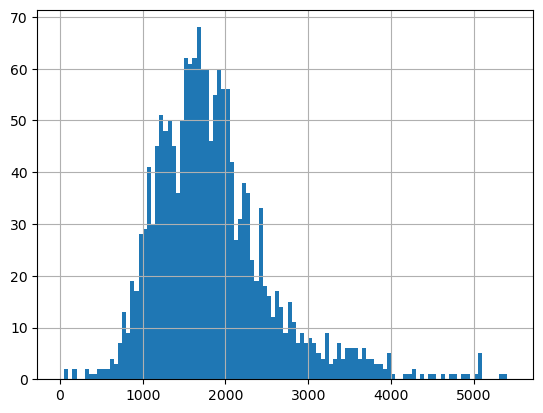

In [191]:
lensScopus = modifiedScopusData['Abstract'].str.len()
lensScopus.hist(bins = np.arange(0,5500,50))

In [161]:
modifiedFrameworkData = originalFrameworkData.copy()
modifiedFrameworkData = modifiedFrameworkData[["Title", "Abstract", "Criterios"]]
modifiedFrameworkData['Abstract'] = modifiedFrameworkData['Abstract'] + " " + modifiedFrameworkData['Title']
modifiedFrameworkData.head()

Title  \
0  A Dashboard to Support Management of Business ...   
1  Project portfolio selection problems: A review...   
2  A decision-making framework for project portfo...   
3  Big data analytics in innovation processes: wh...   
4  A Data-driven project categorization process f...   

                                            Abstract  \
0  Business analytics (BA) systems create value a...   
1  Project portfolio selection has been the focus...   
2  The work we describe addresses the problem of ...   
3  Purpose: The purpose of this paper is to analy...   
4  Purpose: Categorizing projects allows for bett...   

                                      Criterios  
0      Alineación con la estrategia y objetivos  
1  Criterios para establecer objetivos de valor  
2      Alineación con la estrategia y objetivos  
3                                  Optimización  
4                                     Selección

<Axes: >

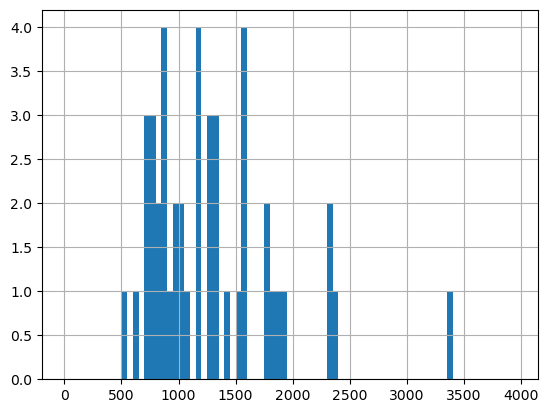

In [193]:
lensFramework = modifiedFrameworkData['Abstract'].str.len()
lensFramework.hist(bins = np.arange(0,4000,50))

### 4.2. Limpieza de datos

In [162]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def delete_numbers(words):
    """Delete all interger occurrences in list of tokenized words"""
    new_words = []
    for word in words:
        if not word.isdigit():
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words
        
    
def preprocessing(words):
    words = to_lowercase(words)
    words = delete_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

### 4.3. Tokenización

In [166]:
tokenizedFrameworkData = modifiedFrameworkData.copy()
tokenizedFrameworkData.head()

Title  \
0  A Dashboard to Support Management of Business ...   
1  Project portfolio selection problems: A review...   
2  A decision-making framework for project portfo...   
3  Big data analytics in innovation processes: wh...   
4  A Data-driven project categorization process f...   

                                            Abstract  \
0  Business analytics (BA) systems create value a...   
1  Project portfolio selection has been the focus...   
2  The work we describe addresses the problem of ...   
3  Purpose: The purpose of this paper is to analy...   
4  Purpose: Categorizing projects allows for bett...   

                                      Criterios  
0      Alineación con la estrategia y objetivos  
1  Criterios para establecer objetivos de valor  
2      Alineación con la estrategia y objetivos  
3                                  Optimización  
4                                     Selección

In [167]:
tokenizedScopusData = modifiedScopusData.copy()
tokenizedScopusData.head()

Title  \
0  Constructive Alignment by Portfolio Exams for ...   
1  Realising the promises of artificial intellige...   
2  Application of Geographic Information Systems ...   
3  Optimization algorithms and investment portfol...   
4  Harnessing the power of synthetic data in heal...   

                                            Abstract  
0  The paper shows how the useful paradigm of con...  
1  To support manufacturing firms in realising th...  
2  New technologies and global datasets enable tr...  
3  Purpose: This paper aims to examine from commo...  
4  Data-driven decision-making in modern healthca...

In [168]:
stop_words = stopwords.words('english')

In [169]:
tokenizedFrameworkData["Abstract"] = tokenizedFrameworkData["Abstract"].apply(contractions.fix)
tokenizedFrameworkData['Words'] = tokenizedFrameworkData['Abstract'].apply(word_tokenize).apply(preprocessing)
tokenizedFrameworkData.head()

Title  \
0  A Dashboard to Support Management of Business ...   
1  Project portfolio selection problems: A review...   
2  A decision-making framework for project portfo...   
3  Big data analytics in innovation processes: wh...   
4  A Data-driven project categorization process f...   

                                            Abstract  \
0  Business analytics (BA) systems create value a...   
1  Project portfolio selection has been the focus...   
2  The work we describe addresses the problem of ...   
3  Purpose: The purpose of this paper is to analy...   
4  Purpose: Categorizing projects allows for bett...   

                                      Criterios  \
0      Alineación con la estrategia y objetivos   
1  Criterios para establecer objetivos de valor   
2      Alineación con la estrategia y objetivos   
3                                  Optimización   
4                                     Selección   

                                               Words  
0  [business, analytics, ba, systems, create, val...  
1  [project, portfolio, selection, focus, many, s...  
2  [work, describe, addresses, problem, deciding,...  
3  [purpose, purpose, paper, analyze, dynamic, ca...  
4  [purpose, categorizing, projects, allows, bett...

In [170]:
tokenizedScopusData["Abstract"] = tokenizedScopusData["Abstract"].apply(contractions.fix)
tokenizedScopusData['Words'] = tokenizedScopusData['Abstract'].apply(word_tokenize).apply(preprocessing)
tokenizedScopusData.head()

Title  \
0  Constructive Alignment by Portfolio Exams for ...   
1  Realising the promises of artificial intellige...   
2  Application of Geographic Information Systems ...   
3  Optimization algorithms and investment portfol...   
4  Harnessing the power of synthetic data in heal...   

                                            Abstract  \
0  The paper shows how the useful paradigm of con...   
1  To support manufacturing firms in realising th...   
2  New technologies and global datasets enable tr...   
3  Purpose: This paper aims to examine from commo...   
4  Data-driven decision-making in modern healthca...   

                                               Words  
0  [paper, shows, useful, paradigm, constructive,...  
1  [support, manufacturing, firms, realising, val...  
2  [new, technologies, global, datasets, enable, ...  
3  [purpose, paper, aims, examine, commodity, por...  
4  [datadriven, decisionmaking, modern, healthcar...

### 4.4. Normalización

In [171]:
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [172]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    new_words = []
    for word in words:
        new_word = stemmer.stem(word)
        new_words.append(new_word)
    return new_words

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    new_words = []
    for word in words:
        new_word = lemmatizer.lemmatize(word)
        new_words.append(new_word)
    return new_words

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

In [173]:
tokenizedFrameworkData['Words'] = tokenizedFrameworkData['Words'].apply(stem_and_lemmatize)
tokenizedFrameworkData.head()

Title  \
0  A Dashboard to Support Management of Business ...   
1  Project portfolio selection problems: A review...   
2  A decision-making framework for project portfo...   
3  Big data analytics in innovation processes: wh...   
4  A Data-driven project categorization process f...   

                                            Abstract  \
0  Business analytics (BA) systems create value a...   
1  Project portfolio selection has been the focus...   
2  The work we describe addresses the problem of ...   
3  Purpose: The purpose of this paper is to analy...   
4  Purpose: Categorizing projects allows for bett...   

                                      Criterios  \
0      Alineación con la estrategia y objetivos   
1  Criterios para establecer objetivos de valor   
2      Alineación con la estrategia y objetivos   
3                                  Optimización   
4                                     Selección   

                                               Words  
0  [busy, analys, ba, system, cre, valu, provid, ...  
1  [project, portfolio, select, foc, many, schola...  
2  [work, describ, address, problem, decid, proje...  
3  [purpos, purpos, pap, analys, dynam, cap, pers...  
4  [purpos, categ, project, allow, bet, align, po...

In [174]:
tokenizedFrameworkData['Words'] = tokenizedFrameworkData['Words'].apply(lambda x: ' '.join(map(str, x)))
tokenizedFrameworkData.head()

Title  \
0  A Dashboard to Support Management of Business ...   
1  Project portfolio selection problems: A review...   
2  A decision-making framework for project portfo...   
3  Big data analytics in innovation processes: wh...   
4  A Data-driven project categorization process f...   

                                            Abstract  \
0  Business analytics (BA) systems create value a...   
1  Project portfolio selection has been the focus...   
2  The work we describe addresses the problem of ...   
3  Purpose: The purpose of this paper is to analy...   
4  Purpose: Categorizing projects allows for bett...   

                                      Criterios  \
0      Alineación con la estrategia y objetivos   
1  Criterios para establecer objetivos de valor   
2      Alineación con la estrategia y objetivos   
3                                  Optimización   
4                                     Selección   

                                               Words  
0  busy analys ba system cre valu provid competit...  
1  project portfolio select foc many scholars las...  
2  work describ address problem decid projectfund...  
3  purpos purpos pap analys dynam cap perspect ro...  
4  purpos categ project allow bet align portfolio...

In [175]:
tokenizedScopusData['Words'] = tokenizedScopusData['Words'].apply(stem_and_lemmatize)
tokenizedScopusData.head()

Title  \
0  Constructive Alignment by Portfolio Exams for ...   
1  Realising the promises of artificial intellige...   
2  Application of Geographic Information Systems ...   
3  Optimization algorithms and investment portfol...   
4  Harnessing the power of synthetic data in heal...   

                                            Abstract  \
0  The paper shows how the useful paradigm of con...   
1  To support manufacturing firms in realising th...   
2  New technologies and global datasets enable tr...   
3  Purpose: This paper aims to examine from commo...   
4  Data-driven decision-making in modern healthca...   

                                               Words  
0  [pap, show, us, paradigm, construct, align, ap...  
1  [support, manufact, firm, real, valu, art, int...  
2  [new, technolog, glob, dataset, en, transport,...  
3  [purpos, pap, aim, examin, commod, portfolio, ...  
4  [datadr, decisionmak, modern, healthc, underpi...

In [176]:
tokenizedScopusData['Words'] = tokenizedScopusData['Words'].apply(lambda x: ' '.join(map(str, x)))
tokenizedScopusData.head()

Title  \
0  Constructive Alignment by Portfolio Exams for ...   
1  Realising the promises of artificial intellige...   
2  Application of Geographic Information Systems ...   
3  Optimization algorithms and investment portfol...   
4  Harnessing the power of synthetic data in heal...   

                                            Abstract  \
0  The paper shows how the useful paradigm of con...   
1  To support manufacturing firms in realising th...   
2  New technologies and global datasets enable tr...   
3  Purpose: This paper aims to examine from commo...   
4  Data-driven decision-making in modern healthca...   

                                               Words  
0  pap show us paradigm construct align apply des...  
1  support manufact firm real valu art intellig a...  
2  new technolog glob dataset en transport projec...  
3  purpos pap aim examin commod portfolio man per...  
4  datadr decisionmak modern healthc underpin inn...

In [177]:
tokenizedScopusData = tokenizedScopusData.drop(columns = ['Abstract'])
tokenizedScopusData.head()

Title  \
0  Constructive Alignment by Portfolio Exams for ...   
1  Realising the promises of artificial intellige...   
2  Application of Geographic Information Systems ...   
3  Optimization algorithms and investment portfol...   
4  Harnessing the power of synthetic data in heal...   

                                               Words  
0  pap show us paradigm construct align apply des...  
1  support manufact firm real valu art intellig a...  
2  new technolog glob dataset en transport projec...  
3  purpos pap aim examin commod portfolio man per...  
4  datadr decisionmak modern healthc underpin inn...

In [179]:
criteria = tokenizedFrameworkData['Criterios'].unique().tolist()
print(criteria)

['Alineación con la estrategia y objetivos', 'Criterios para establecer objetivos de valor', 'Optimización', 'Selección', 'Criterios para el monitoreo y medición de valor.', 'Medición o cuantificación de riesgos', 'Gobierno del portafolio', 'Criterios financieros para la selección de proyectos', 'Identificación de riesgos', 'Gestión de capacidades', 'Métricas para el monitoreo del portafolio de proyectos', 'Criterios para la medición de beneficios.', 'Gestión de intersados', 'Papel de la analitica?', 'KPI', 'Criterios financieros para la ejecución del portfolio ', 'Priorización']


In [180]:
frameworkOnehot = pd.get_dummies(tokenizedFrameworkData['Criterios'])
tokenizedFrameworkData = pd.concat([tokenizedFrameworkData, frameworkOnehot], axis=1)
tokenizedFrameworkData = tokenizedFrameworkData.drop(columns = ['Abstract', 'Criterios'])
tokenizedFrameworkData.head()

Title  \
0  A Dashboard to Support Management of Business ...   
1  Project portfolio selection problems: A review...   
2  A decision-making framework for project portfo...   
3  Big data analytics in innovation processes: wh...   
4  A Data-driven project categorization process f...   

                                               Words  \
0  busy analys ba system cre valu provid competit...   
1  project portfolio select foc many scholars las...   
2  work describ address problem decid projectfund...   
3  purpos purpos pap analys dynam cap perspect ro...   
4  purpos categ project allow bet align portfolio...   

   Alineación con la estrategia y objetivos  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   Criterios financieros para la ejecución del portfolio   \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   Criterios financieros para la selección de proyectos  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Criterios para el monitoreo y medición de valor.  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Criterios para establecer objetivos de valor  \
0                                             0   
1                                             1   
2                                             0   
3                                             0   
4                                             0   

   Criterios para la medición de beneficios.  Gestión de capacidades  \
0                                          0                       0   
1                                          0                       0   
2                                          0                       0   
3                                          0                       0   
4                                          0                       0   

   Gestión de intersados  Gobierno del portafolio  Identificación de riesgos  \
0                      0                        0                          0   
1                      0                        0                          0   
2                      0                        0                          0   
3                      0                        0                          0   
4                      0                        0                          0   

   KPI  Medición o cuantificación de riesgos  \
0    0                                     0   
1    0                                     0   
2    0                                     0   
3    0                                     0   
4    0                                     0   

   Métricas para el monitoreo del portafolio de proyectos  Optimización  \
0                                                  0                  0   
1                                                  0                  0   
2                                                  0                  0   
3                                                  0                  1   
4                                                  0                  0   

   Papel de la analitica?  Priorización  Selección  
0                      

In [181]:
vectorizerFr = TfidfVectorizer()
vecsFr = vectorizerFr.fit_transform(tokenizedFrameworkData['Words'])
featureNamesFr = vectorizerFr.get_feature_names_out()
denseFr = vecsFr.todense()
lstFr = denseFr.tolist()
dfIdfScoreFr = pd.DataFrame(lstFr, columns=featureNamesFr)
dfIdfScoreFr.head()

01  19732011  2010  20year  3click   40  9915  ability  abl  academ  ...  \
0  0.0       0.0   0.0     0.0     0.0  0.0   0.0      0.0  0.0     0.0  ...   
1  0.0       0.0   0.0     0.0     0.0  0.0   0.0      0.0  0.0     0.0  ...   
2  0.0       0.0   0.0     0.0     0.0  0.0   0.0      0.0  0.0     0.0  ...   
3  0.0       0.0   0.0     0.0     0.0  0.0   0.0      0.0  0.0     0.0  ...   
4  0.0       0.0   0.0     0.0     0.0  0.0   0.0      0.0  0.0     0.0  ...   

   working     world  would  wrestl  wrestling      year       yet    yield  \
0      0.0  0.000000    0.0     0.0        0.0  0.000000  0.000000  0.00000   
1      0.0  0.000000    0.0     0.0        0.0  0.072646  0.082345  0.00000   
2      0.0  0.000000    0.0     0.0        0.0  0.000000  0.000000  0.15037   
3      0.0  0.201244    0.0     0.0        0.0  0.000000  0.000000  0.00000   
4      0.0  0.000000    0.0     0.0        0.0  0.000000  0.000000  0.00000   

   zon  zone  
0  0.0   0.0  
1  0.0   0.0  
2  0.0   0.0  
3  0.0   0.0  
4  0.0   0.0  

[5 rows x 2248 columns]

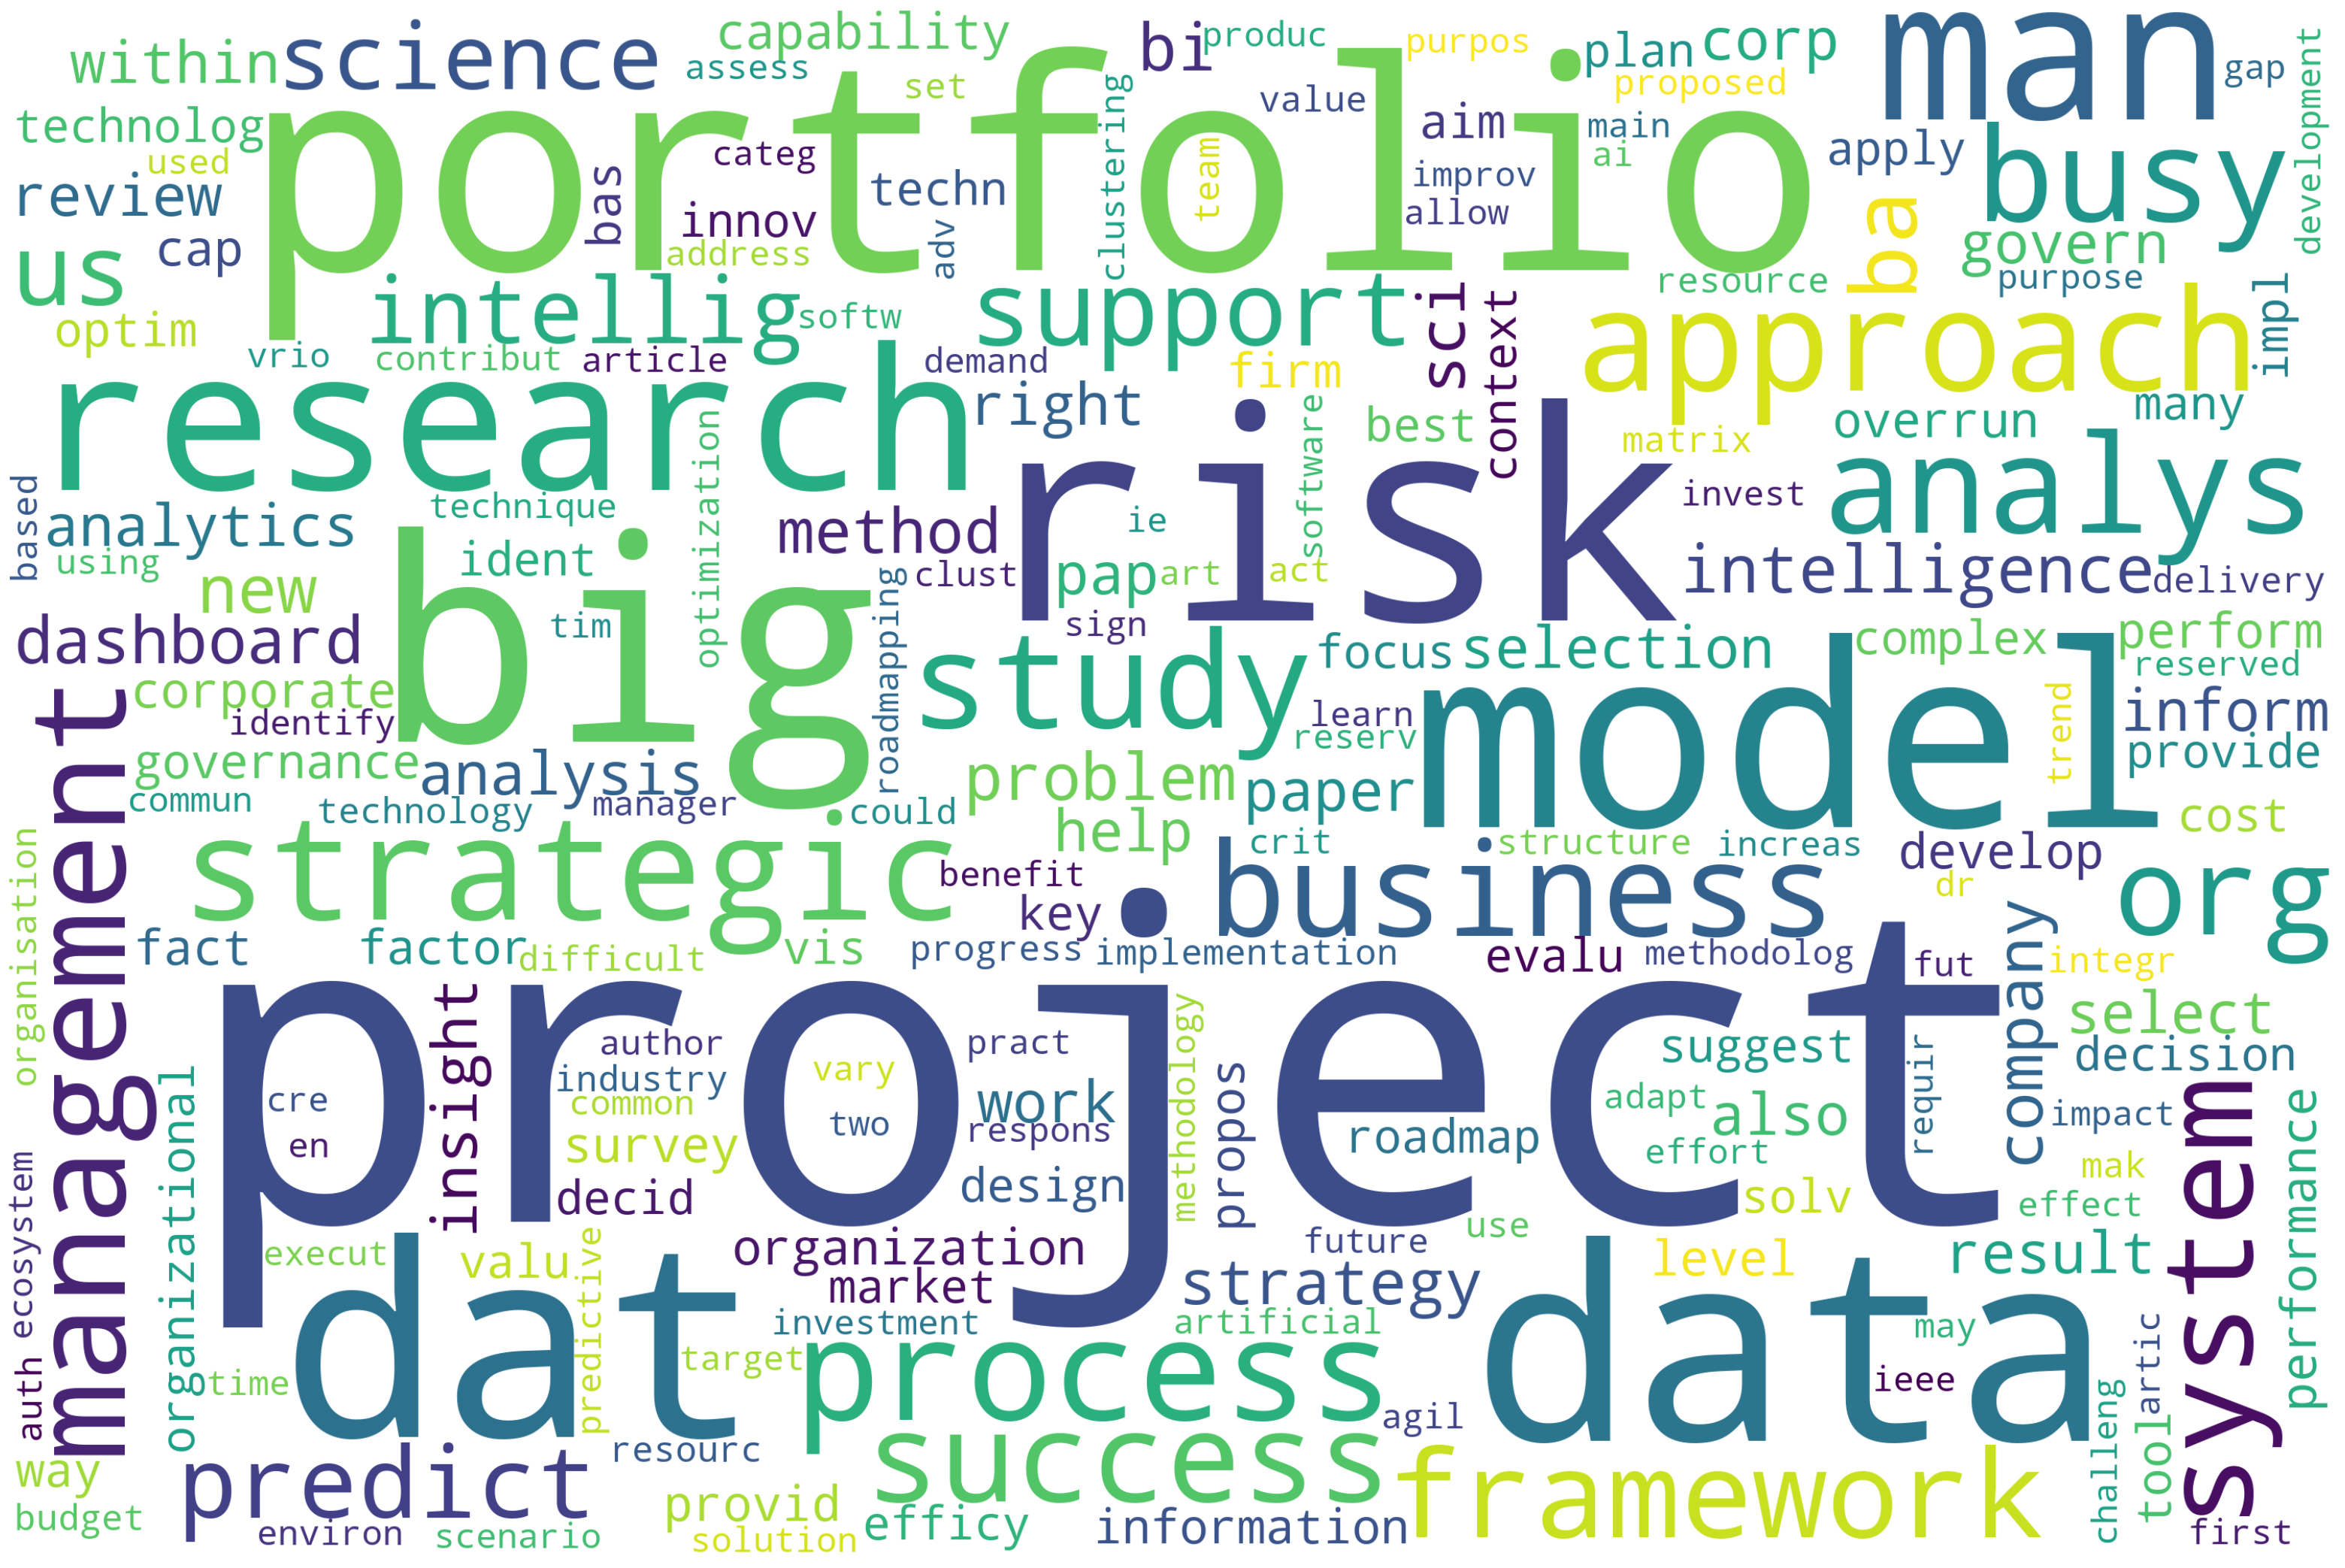

In [182]:
tfIdfCounterFr = dfIdfScoreFr.T.sum(axis=1)
wordcloudFr = WordCloud(width = 3000, height = 2000,background_color='white')
wordcloudFr.generate_from_frequencies(tfIdfCounterFr)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloudFr, interpolation='bilinear')
plt.axis("off")
plt.show()

In [183]:
vectorizerSc = TfidfVectorizer()
vecsSc = vectorizerSc.fit_transform(tokenizedScopusData['Words'])
featureNamesSc = vectorizerSc.get_feature_names_out()
denseSc = vecsSc.todense()
lstSc = denseSc.tolist()
dfIdfScoreSc = pd.DataFrame(lstSc, columns=featureNamesSc)
dfIdfScoreSc.head()

000  0001  0005  001  0022  004268  005  0050tw   01  0140  ...  zone  \
0  0.0   0.0   0.0  0.0   0.0     0.0  0.0     0.0  0.0   0.0  ...   0.0   
1  0.0   0.0   0.0  0.0   0.0     0.0  0.0     0.0  0.0   0.0  ...   0.0   
2  0.0   0.0   0.0  0.0   0.0     0.0  0.0     0.0  0.0   0.0  ...   0.0   
3  0.0   0.0   0.0  0.0   0.0     0.0  0.0     0.0  0.0   0.0  ...   0.0   
4  0.0   0.0   0.0  0.0   0.0     0.0  0.0     0.0  0.0   0.0  ...   0.0   

   zorg  zos  zscore  zscores  zul  zulia  zumb  zumbi  zur  
0   0.0  0.0     0.0      0.0  0.0    0.0   0.0    0.0  0.0  
1   0.0  0.0     0.0      0.0  0.0    0.0   0.0    0.0  0.0  
2   0.0  0.0     0.0      0.0  0.0    0.0   0.0    0.0  0.0  
3   0.0  0.0     0.0      0.0  0.0    0.0   0.0    0.0  0.0  
4   0.0  0.0     0.0      0.0  0.0    0.0   0.0    0.0  0.0  

[5 rows x 22543 columns]

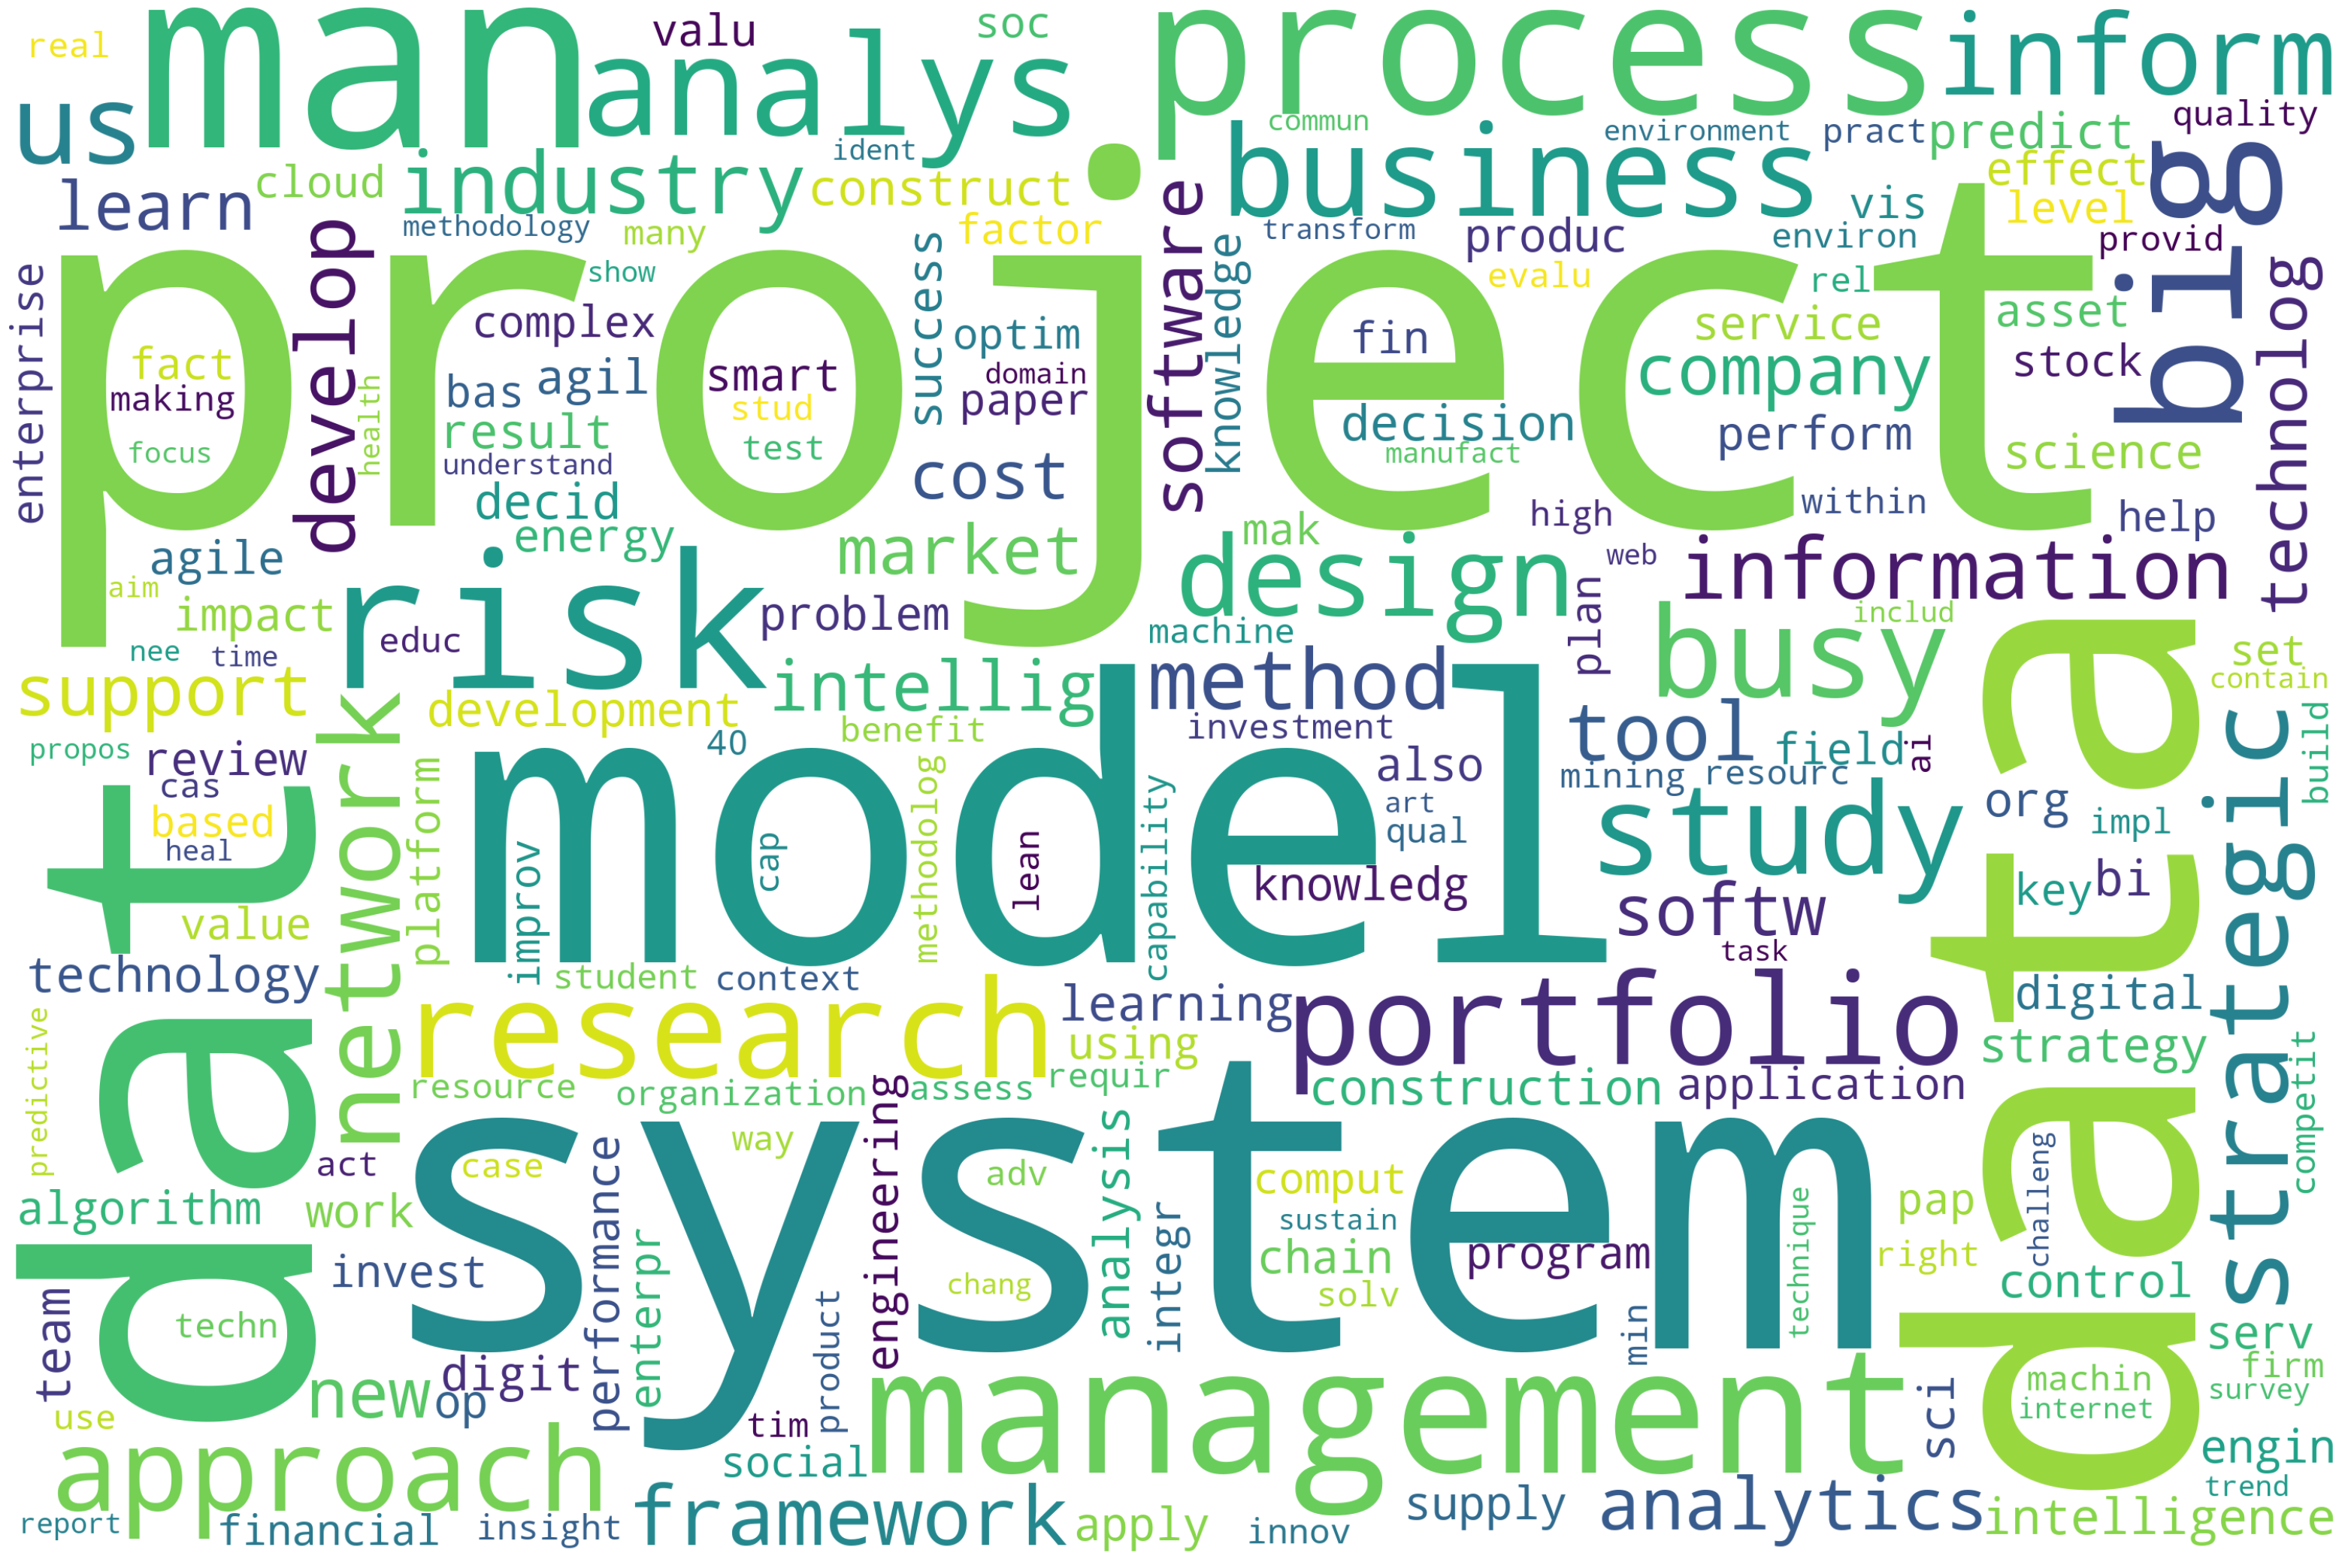

In [184]:
tfIdfCounterSc = dfIdfScoreSc.T.sum(axis=1)
wordcloudSc = WordCloud(width = 3000, height = 2000,background_color='white')
wordcloudSc.generate_from_frequencies(tfIdfCounterSc)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloudSc, interpolation='bilinear')
plt.axis("off")
plt.show()

## 5. Modelo predictivo de clasificación

### 5.1. Preparación del conjunto de entrenamiento

In [196]:
train, test = train_test_split(tokenizedFrameworkData, random_state=42, test_size=0.35, shuffle=True)
X_train = train['Words']
X_test = test['Words']
print(X_train.shape)
print(X_test.shape)

(29,)
(16,)


In [114]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])for criterion in criteria:
    print('... Procesando {}'.format(criterion))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[criterion])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

(27, 1655)